In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('data/Erin_s_flights1.csv')  

# Создание фасета "Timestamp" из столбца "Timestamp"
timestamp_facet = data['Timestamp']

# Создание фасета "City" из столбца "City"
city_facet = data['City']

# Вывод результатов
print("Timestamp facet:")
print(timestamp_facet)
print("\nCity facet:")
print(city_facet)


Timestamp facet:
0     7/16/2019 16:30:00
1     1/22/2019 16:30:00
2      7/1/2019 13:15:00
3     1/12/2019 13:03:00
4     2/13/2019 14:20:00
             ...        
87    4/15/2019 13:00:00
88     4/22/2019 7:35:00
89    4/18/2019 21:34:00
90    6/11/2019 12:33:00
91     5/22/2019 7:35:00
Name: Timestamp, Length: 92, dtype: object

City facet:
0          New York
1          New York
2            Munich
3            Munich
4            Munich
          ...      
87           London
88           Munich
89    San Francisco
90         Brussels
91           Munich
Name: City, Length: 92, dtype: object


In [61]:
# Преобразование столбца "Timestamp" в формат даты и времени
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Создание нового столбца "Date" с датами
data['Date'] = data['Timestamp'].dt.date

# Подсчет количества событий по дням
events_by_day = data['Date'].value_counts().sort_index()

# Вывод результатов
print("Events by day:")
print(events_by_day)



Events by day:
2019-01-12    5
2019-01-22    5
2019-01-23    2
2019-02-12    2
2019-02-13    5
2019-02-17    7
2019-04-15    5
2019-04-17    7
2019-04-18    8
2019-04-21    3
2019-04-22    2
2019-04-26    2
2019-04-27    8
2019-05-15    5
2019-05-21    3
2019-05-22    2
2019-06-11    5
2019-07-01    5
2019-07-16    6
2019-07-20    5
Name: Date, dtype: int64


In [62]:
# Создание нового столбца "Hour" с часами
data['Hour'] = data['Timestamp'].dt.hour

# Подсчет количества событий по часам
events_by_hour = data['Hour'].value_counts().sort_index()

# Вывод результатов
print("Events by hour:")
print(events_by_hour)

Events by hour:
1      4
5      1
6      1
7      2
8      2
9      6
10     9
11     6
12    11
13     8
14     8
15     2
16     8
17     7
18     2
19     2
20     5
21     5
22     2
23     1
Name: Hour, dtype: int64


In [63]:
# Извлечение месяца из столбца "Timestamp"
data['Month'] = data['Timestamp'].dt.month

# Подсчет количества событий по месяцам
events_by_month = data['Month'].value_counts().sort_index()

# Вывод результатов
print("Events by month:")
print(events_by_month)

Events by month:
1    12
2    14
4    35
5    10
6     5
7    16
Name: Month, dtype: int64


In [64]:
# Удаление пробела из названия столбца "Activity"
data.rename(columns={'Activity ': 'Activity'}, inplace=True)

Abnormal Events by month:
1    1
2    2
4    6
Name: Month, dtype: int64


C:\Users\Карина\AppData\Local\Temp\ipykernel_11956\1376525484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_events['Timestamp'] = pd.to_datetime(abnormal_events['Timestamp'])
C:\Users\Карина\AppData\Local\Temp\ipykernel_11956\1376525484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_events['Month'] = abnormal_events['Timestamp'].dt.month


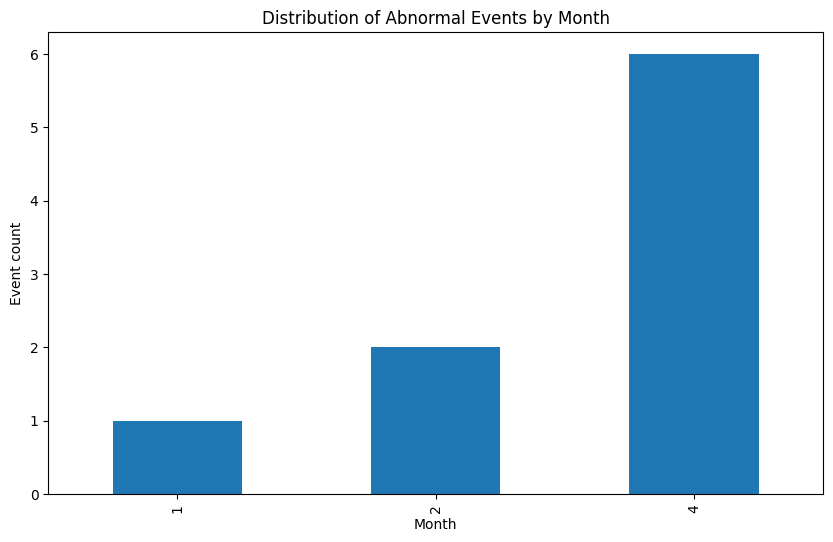

In [65]:
# Фильтрация данных по внештатным событиям
abnormal_events = data[data['Activity'].isin(['Flight canceled', 'Missed my flight', 'Mechanical problem', 'Delay'])]

# Преобразование столбца "Timestamp" в формат даты и времени
abnormal_events['Timestamp'] = pd.to_datetime(abnormal_events['Timestamp'])

# Создание нового столбца "Month" с месяцами
abnormal_events['Month'] = abnormal_events['Timestamp'].dt.month

# Анализ распределения внештатных событий по месяцам
events_by_month = abnormal_events['Month'].value_counts().sort_index()

# Вывод результатов
print("Abnormal Events by month:")
print(events_by_month)

# Визуализация распределения внештатных событий по месяцам
plt.figure(figsize=(10, 6))
events_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Event count')
plt.title('Distribution of Abnormal Events by Month')

plt.show()

In [66]:
# Определение количества уникальных месяцев
num_months = data['Month'].nunique()
# Вывод результата
print("Number of months:", num_months)

Number of months: 6


Events by city:
Munich      5
Paris       3
New York    1
Name: City, dtype: int64


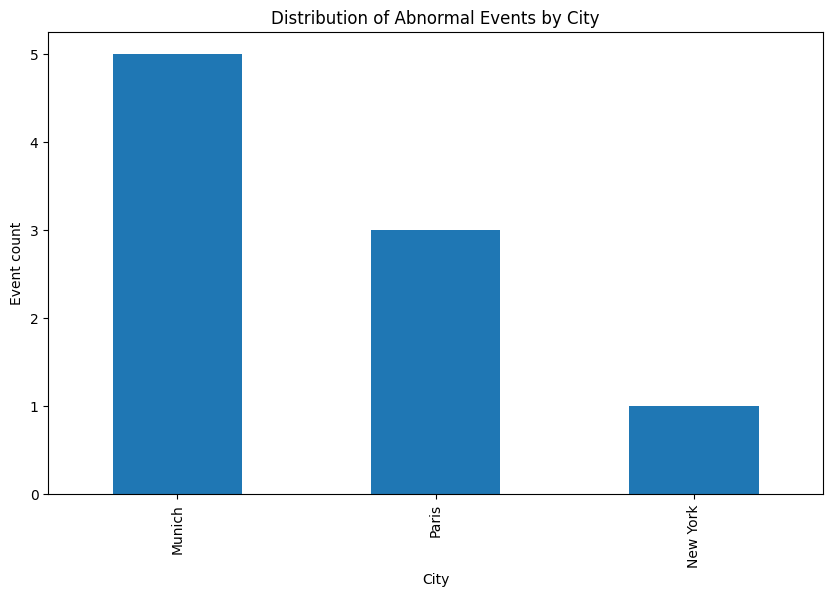

In [67]:
# Анализ распределения внештатных событий по городам
events_by_city = abnormal_events['City'].value_counts()

# Вывод результатов
print("Events by city:")
print(events_by_city)

# Визуализация распределения внештатных событий по городам
plt.figure(figsize=(10, 6))
events_by_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Event count')
plt.title('Distribution of Abnormal Events by City')

plt.show()

In [68]:
# Удаление пробела из названия столбца "Activity"
data.rename(columns={'City ': 'City'}, inplace=True)

In [69]:
data['Facets'] = data['City'] + ' | ' + data['Hour'].astype(str) + ' | ' + data['Month'].astype(str)

# Удаление использованных фасетов
data.drop(['City', 'Hour', 'Month'], axis=1, inplace=True)

data.head()

,Flight,Activity,Timestamp,Date,Facets
0,TR521,Take off,2019-07-16 16:30:00,2019-07-16,New York | 16 | 7
1,TR520,Take off,2019-01-22 16:30:00,2019-01-22,New York | 16 | 1
2,TR321,Take off,2019-07-01 13:15:00,2019-07-01,Munich | 13 | 7
3,TR320,Take off,2019-01-12 13:03:00,2019-01-12,Munich | 13 | 1
4,PR121,Take off,2019-02-13 14:20:00,2019-02-13,Munich | 14 | 2


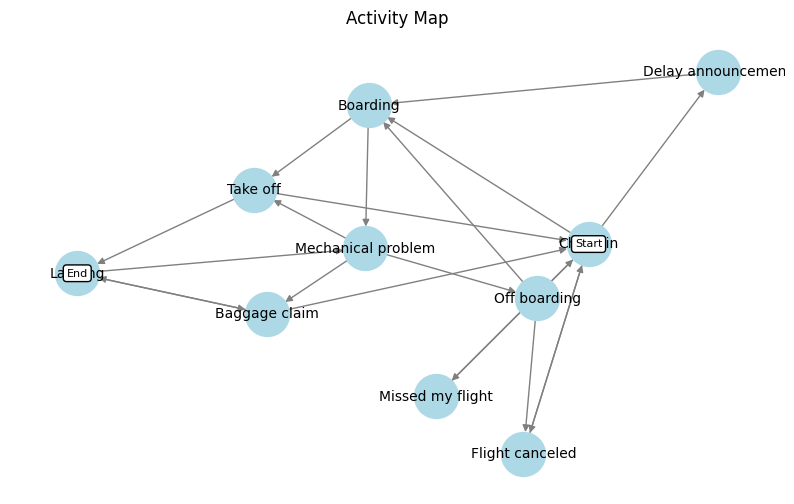

In [70]:
# Создание графа
G = nx.DiGraph()

# Сортировка данных по времени
data = data.sort_values(by='Timestamp')

# Добавление узлов графа на основе событий
for i, activity in enumerate(data['Activity']):
    G.add_node(activity)

# Добавление ребер графа на основе последовательности событий
for i in range(len(data)-1):
    source = data['Activity'].iloc[i]
    target = data['Activity'].iloc[i+1]
    G.add_edge(source, target)

# Визуализация активити-схемы
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, edge_color='gray')
plt.title('Activity Map')
plt.axis('off')

# Добавление обозначения старта и окончания процессов
start_node = data['Activity'].iloc[0]
end_node = data['Activity'].iloc[-1]
plt.text(pos[start_node][0], pos[start_node][1], 'Start', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(pos[end_node][0], pos[end_node][1], 'End', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.show()


In [71]:
# Путь к файлу CSV
csv_file = 'data/flights_delay.csv'

# Сохранение датасета в CSV
data.to_csv(csv_file, index=False)